In [13]:
#Importancion de la libreria necesaria
# ==============================================================================
import numpy as np #útil para operaciones matemáticas, arrays, álgebra lineal y estadísticas con eficiencia.
import pandas as pd #para manipular y analizar estructuras tabulares como DataFrames y Series.
import statsmodels.api as sm #para análisis estadístico, modelos de regresión, pruebas de hipótesis y estadística descriptiva.
from ydata_profiling import ProfileReport #Genera informes automáticos de análisis exploratorio de datos (EDA) a partir de DataFrames.
import re #Permite trabajar con expresiones regulares para validar, buscar o transformar texto en strings.
# ==============================================================================
import matplotlib.pyplot as plt #para crear gráficos como histogramas, líneas, dispersión y visualizaciones en general.
import matplotlib.font_manager #Gestiona y accede a las fuentes tipográficas usadas en las visualizaciones de matplotlib.
from matplotlib import style #Permite aplicar estilos predefinidos (como ggplot) a las visualizaciones de matplotlib fácilmente.
style.use('ggplot') or plt.style.use('ggplot') #Aplica el estilo visual ggplot a los gráficos para mejorar estética y coherencia visual.
 
# ==============================================================================
from sklearn.decomposition import PCA #Importa PCA, técnica para reducir dimensiones preservando varianza, usada en Machine Learning.
from sklearn.pipeline import make_pipeline #Crea pipelines que encadenan pasos de preprocesamiento y modelado en flujos reutilizables.
from sklearn.preprocessing import StandardScaler #Escala los datos para que tengan media cero y desviación estándar uno (normalización).
from sklearn.preprocessing import scale #Función alternativa para escalar rápidamente datos sin crear objetos StandardScaler.
 
import dtale #Herramienta para explorar DataFrames interactivamente en el navegador, útil para EDA visual.
import itables #Permite mostrar DataFrames como tablas interactivas con filtros y ordenamientos en notebooks.
 
# ==============================================================================
import warnings
warnings.filterwarnings('ignore') #Desactiva la visualización de advertencias para mantener la salida limpia y enfocada.

In [8]:
dfCredito= pd.read_excel("DataSet_ETL.xlsx")
dfCredito.drop(["Unnamed: 0"], axis=1, inplace=True)
dfCredito.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month (Y)
0,120000,female,university,2,26,-1,2,-1,-1,-1,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
1,90000,female,university,2,34,-1,-1,-1,-1,-1,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default


In [9]:
dfCredito.dtypes

LIMIT_BAL                          int64
SEX                               object
EDUCATION                         object
MARRIAGE                           int64
AGE                                int64
PAY_0                              int64
PAY_2                              int64
PAY_3                              int64
PAY_4                              int64
PAY_5                              int64
PAY_6                              int64
BILL_AMT1                          int64
BILL_AMT2                          int64
BILL_AMT3                          int64
BILL_AMT4                          int64
BILL_AMT5                          int64
BILL_AMT6                          int64
PAY_AMT1                           int64
PAY_AMT2                           int64
PAY_AMT3                           int64
PAY_AMT4                           int64
PAY_AMT5                           int64
PAY_AMT6                           int64
default payment next month (Y)    object
dtype: object

In [10]:
print(dfCredito.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month (Y)'],
      dtype='object')


In [11]:
caracteristicas = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

dfCopia = dfCredito.copy()
variableCategoricas = dfCredito.select_dtypes(include = ['object', 'string', 'category']).columns.tolist()
print("Variables categoricas: ", variableCategoricas)

Variables categoricas:  ['SEX', 'EDUCATION', 'default payment next month (Y)']


In [12]:
dfCopia = pd.get_dummies(dfCopia, columns=variableCategoricas, drop_first = True, dtype=int)
dfCopia.head(5)

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_male,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month (Y)_not default
0,120000,2,26,-1,2,-1,-1,-1,2,2682,...,1000,1000,1000,0,2000,0,0,0,1,0
1,90000,2,34,-1,-1,-1,-1,-1,-1,29239,...,1500,1000,1000,1000,5000,0,0,0,1,1
2,50000,1,37,-1,-1,-1,-1,-1,-1,46990,...,2019,1200,1100,1069,1000,0,0,0,1,1
3,50000,1,57,-1,-1,-1,-1,-1,-1,8617,...,36681,10000,9000,689,679,1,0,0,1,1
4,50000,2,37,-1,-1,-1,-1,-1,-1,64400,...,1815,657,1000,1000,800,1,0,0,0,1


In [14]:
dfCopia.drop(['default payment next month (Y)_not default'], axis=1, inplace=True)
dfCopia.head(5)

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_male,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,120000,2,26,-1,2,-1,-1,-1,2,2682,...,0,1000,1000,1000,0,2000,0,0,0,1
1,90000,2,34,-1,-1,-1,-1,-1,-1,29239,...,1518,1500,1000,1000,1000,5000,0,0,0,1
2,50000,1,37,-1,-1,-1,-1,-1,-1,46990,...,2000,2019,1200,1100,1069,1000,0,0,0,1
3,50000,1,57,-1,-1,-1,-1,-1,-1,8617,...,2000,36681,10000,9000,689,679,1,0,0,1
4,50000,2,37,-1,-1,-1,-1,-1,-1,64400,...,2500,1815,657,1000,1000,800,1,0,0,0


In [17]:
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=25))
pca_pipe.fit(dfCopia)

modelo_pca= pca_pipe.named_steps['pca']

pca_pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=25))])

In [18]:
componentes = pca_pipe.fit_transform(dfCopia)
modelo_pca.components_

array([[ 1.96136460e-01, -3.15013836e-02,  4.04236281e-02,
        -7.98832124e-03,  4.30251120e-03, -4.74847327e-04,
         5.49486657e-03,  1.23855651e-02,  2.55431277e-03,
         3.71972814e-01,  3.83614346e-01,  3.82052147e-01,
         3.86099017e-01,  3.81863577e-01,  3.74123141e-01,
         1.34495244e-01,  1.31094764e-01,  1.63468807e-01,
         1.01115714e-01,  1.05077281e-01,  9.04941813e-02,
         2.08246405e-02, -1.58914214e-02,  1.19980756e-02,
        -1.27559398e-03],
       [-1.34954266e-01,  2.20668904e-02, -5.47310677e-03,
         3.45653232e-01,  3.96400755e-01,  4.18622647e-01,
         4.23440547e-01,  4.13563584e-01,  3.85529369e-01,
         8.07396641e-03,  1.42945013e-02,  2.40361235e-02,
         3.45218733e-02,  4.22295129e-02,  4.17979060e-02,
        -7.38137798e-02, -7.33094543e-02, -3.82707893e-02,
        -5.65781729e-02, -5.76922785e-02, -4.96256543e-02,
         1.97728648e-02,  3.53023191e-02, -2.42657472e-02,
         3.70286505e-02],
    

In [19]:
var_ratio = modelo_pca.explained_variance_ratio_
var_ratio

array([0.24637246, 0.15929749, 0.06658959, 0.06086319, 0.05008102,
       0.04177972, 0.04138601, 0.04007192, 0.03762279, 0.03552295,
       0.03467905, 0.03105826, 0.0293827 , 0.02427948, 0.02146873,
       0.01891585, 0.01645152, 0.01284875, 0.00952683, 0.00825308,
       0.00768635, 0.00262869, 0.00170845, 0.00080833, 0.00071679])

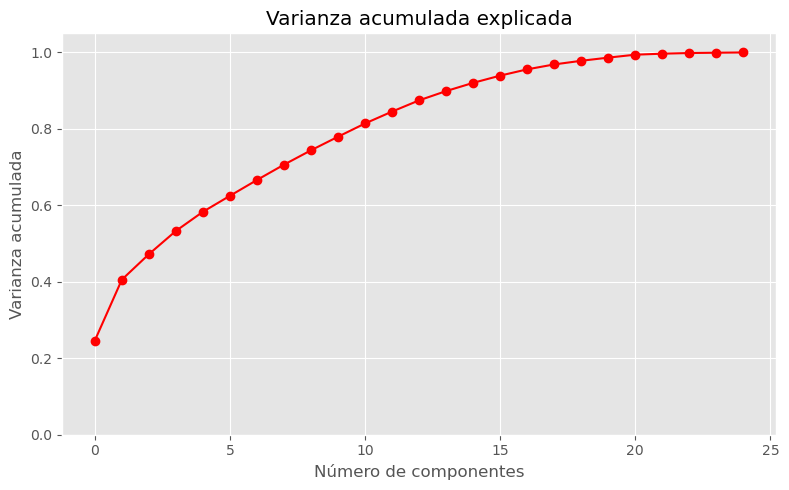

In [20]:
#Se crea la grafica para visualizar la varianza explicada
plt.style.use('ggplot')
plt.figure(figsize=(8, 5))
plt.plot(
    np.cumsum(var_ratio),
    marker='o', linestyle='-', color='red'
)
plt.title('Varianza acumulada explicada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.ylim(0, 1.05)  
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
principalDf = pd.DataFrame(data = componentes
             , columns = ['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12','pca13','pca14','pca15',
                         'pca16', 'pca17', 'pca18','pca19','pca20', 'pca21', 'pca22', 'pca23', 'pca24', 'pca25'])
 
principalDf.head(10)

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25
0,-1.672757,1.298436,-1.511380,0.611356,0.108581,-0.519290,-0.451727,0.105118,0.187554,0.042836,...,-1.357000,0.699543,2.442437,0.777953,0.029715,1.104428,0.040212,-0.006146,-0.005922,0.015757
1,-1.213043,-0.787415,-1.239859,0.123918,0.366660,-0.606975,-0.280725,0.271771,0.024634,-0.187009,...,0.122080,0.003195,0.015693,0.049186,-0.049672,0.001948,-0.085807,-0.105779,-0.010344,-0.037122
2,-0.509777,-0.739865,-0.402696,-0.322126,1.518869,-0.688685,-0.577167,0.541262,0.004734,-0.412325,...,-0.086393,-0.360386,-0.038691,0.036984,0.086362,-0.013838,0.009891,0.127842,-0.010719,-0.051822
3,-0.587015,-0.963252,1.546806,0.699598,1.967600,0.362048,1.034583,0.460441,-1.029384,0.039170,...,0.296850,-0.709539,-0.010397,-0.138627,-0.159118,-0.095463,-0.031295,0.097922,-0.026444,-0.039400
4,-0.514707,-0.742272,-0.378868,-0.764541,-0.679719,0.510390,1.196138,0.034501,-0.645257,-0.174660,...,-0.098290,-0.979855,0.000335,0.038096,0.423977,-0.018286,-0.034658,0.207843,-0.018626,-0.133225
5,15.231190,-0.805883,-1.203529,-0.343789,-1.588809,-0.397281,0.693924,0.203134,-1.340224,0.095716,...,0.057559,-0.209381,-0.152800,0.019602,-2.769403,0.371421,0.616937,-0.622682,-0.064580,-0.035275
6,-1.764531,-0.806729,-1.853601,0.289480,0.015777,-0.655150,-0.359355,0.080547,0.186911,-0.205116,...,0.122440,0.430311,0.012609,0.066246,0.000897,0.002380,-0.044147,-0.067272,-0.014148,-0.025271
7,-1.354223,0.191908,1.303947,-1.036071,-0.938258,-0.946840,-0.974849,-0.146413,0.295028,0.037707,...,1.499063,0.579739,0.818217,-0.837335,-0.182233,-0.965349,0.018260,-0.023264,0.051932,0.047037
8,-1.672814,-0.692265,0.768582,-1.486616,-1.685609,0.569601,0.632929,-0.505839,-0.863189,0.471330,...,0.153231,0.556268,-0.064944,0.078372,-0.186551,0.025780,-0.028067,0.026127,-0.018175,0.011629
9,-1.475544,0.155174,0.918027,-0.928929,-1.705173,-0.774938,-0.607617,-0.458972,0.381525,0.091698,...,1.782215,0.711650,0.920000,-0.846313,-0.155510,-0.978444,-0.062686,-0.001342,0.010356,0.050372


1) No se puede implementar una RLS, porque es una var independiente vs la variable dependiente, y la explicacion de la variable mas alta es de apenas un 27%
2) Para el 90% se ocupa 15 componentes, entonces podria ser variable una RLM
3) RLS o RLM es que la variable y sea numerica continua

In [ ]:
0.